# Telco Customer Churn Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
# 3. Initial Cleaning (Safe from KeyError and SettingWithCopyWarning)
if 'customerID' in df.columns:
    df.drop("customerID", axis=1, inplace=True)

# Convert 'TotalCharges' to numeric and fill NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing values in TotalCharges before fill:", df['TotalCharges'].isnull().sum())

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print("Missing values in TotalCharges after fill:", df['TotalCharges'].isnull().sum())


Missing values in TotalCharges before fill: 0
Missing values in TotalCharges after fill: 0


In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode remaining categorical variables
df = pd.get_dummies(df, drop_first=True)


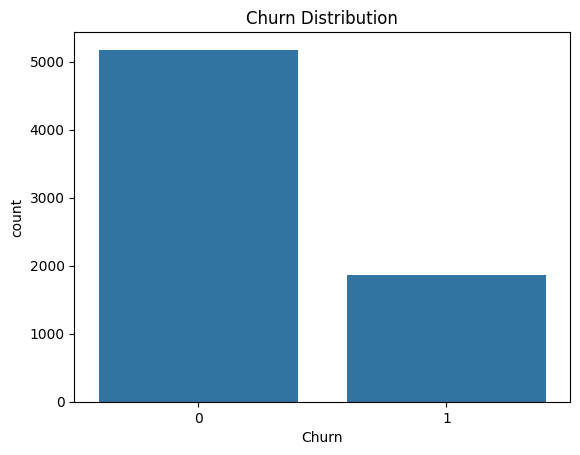

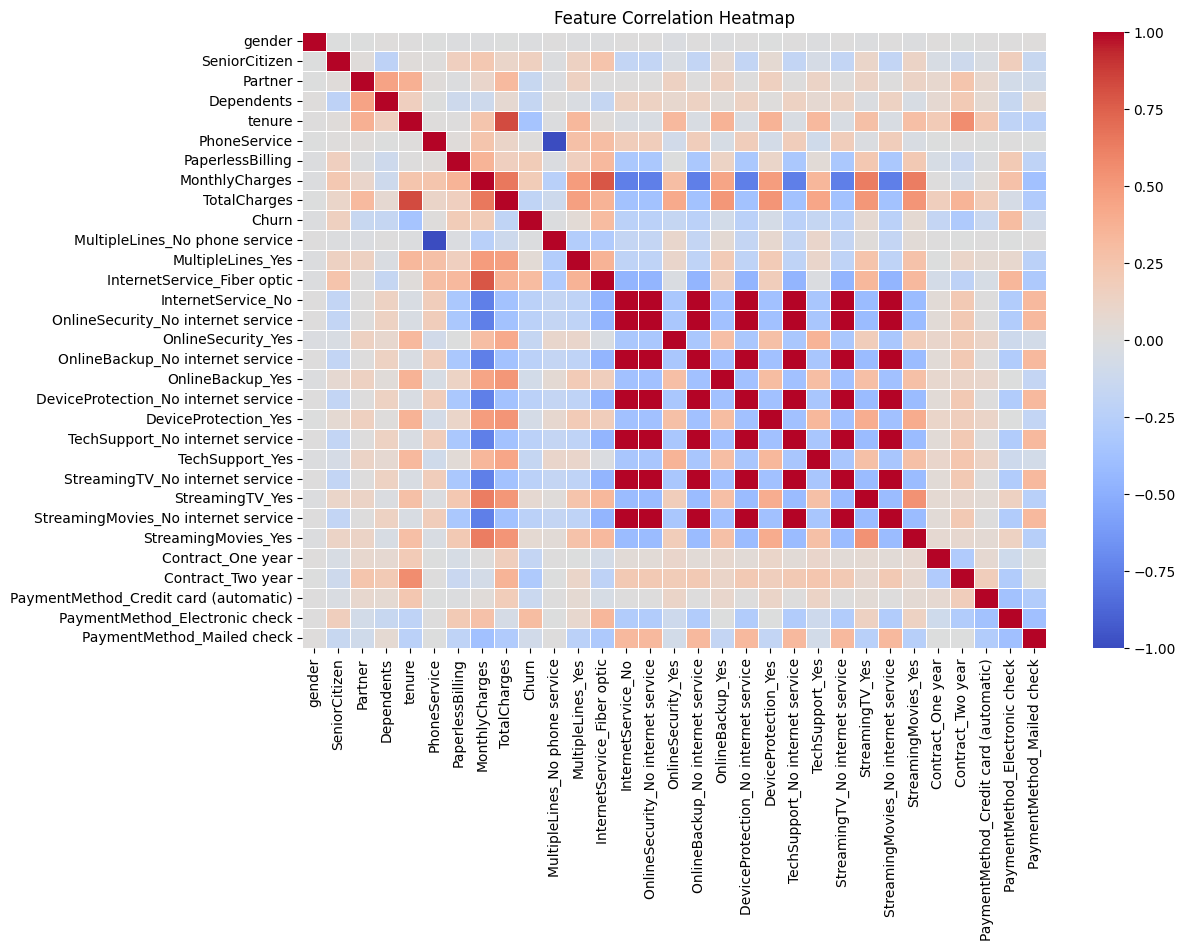

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



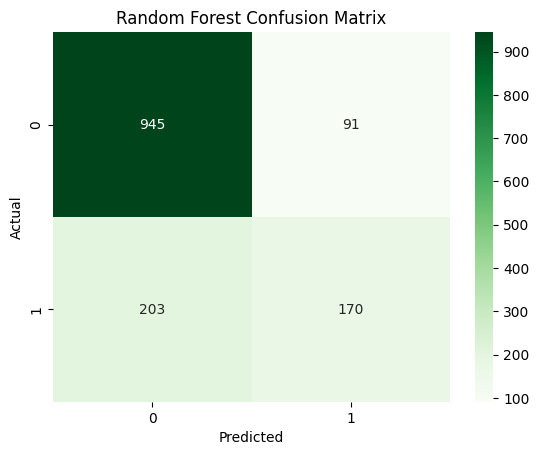

In [17]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


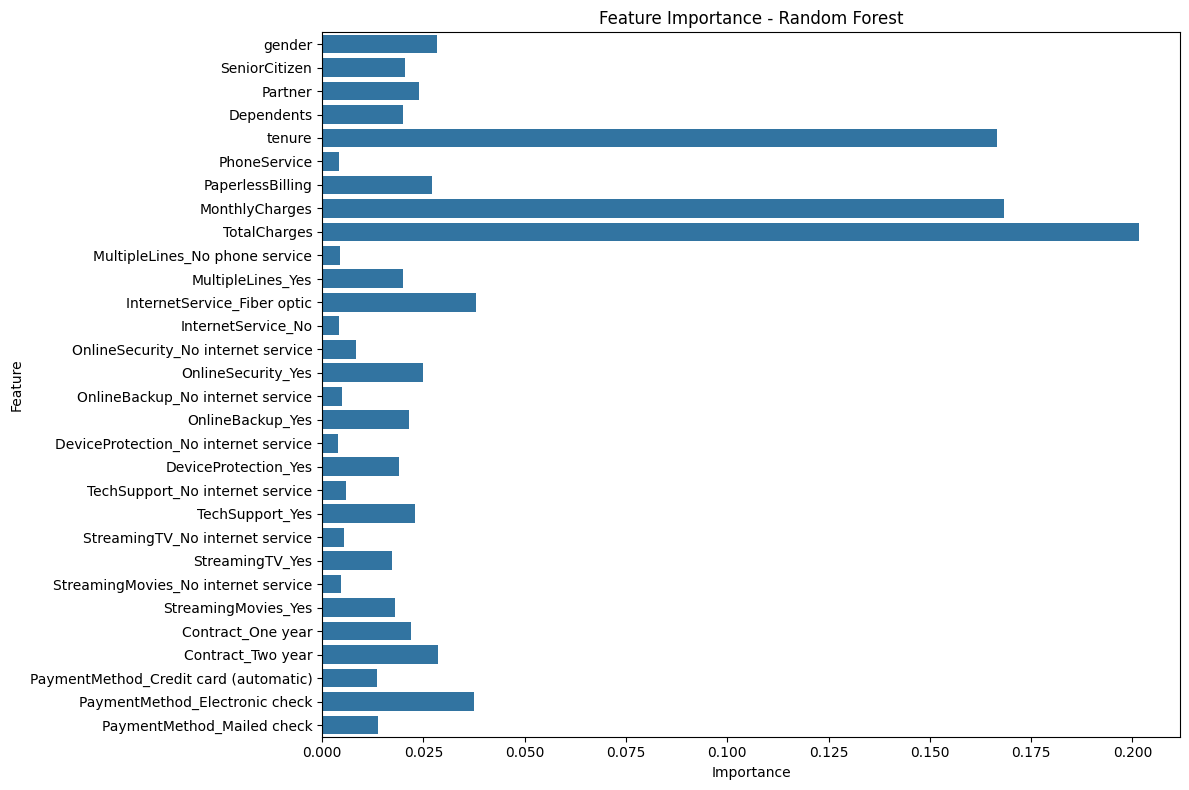

In [18]:
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


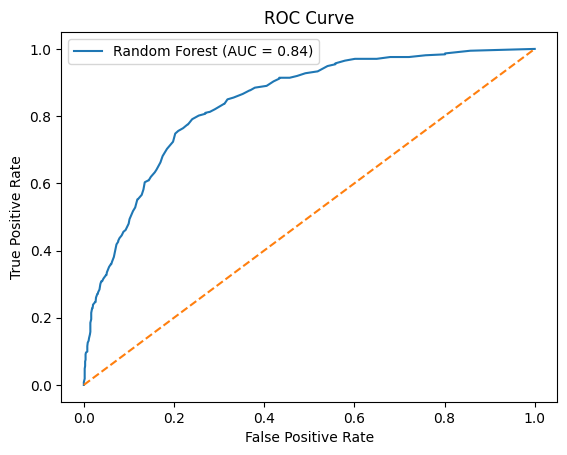

In [19]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Best Score: 0.8035143769968052


Conclusion

In this project, we focused on predicting customer churn using the Telco dataset. After preprocessing and exploring the data, we built classification models, with Random Forest showing the best results. Features like contract type, payment method, and monthly charges were strong indicators of churn. These findings can support targeted retention strategies and help reduce customer loss.
